In [1]:
pwd

'/Users/f0053cz/Documents/psyanim_v2/scripts_for_beh_paper/code'

In [2]:
from func_curvefit import r_squared
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [3]:
s=16 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend

In [57]:
df = pd.read_csv(f'../data/subtlety_playfight_data/curvefit_traits_merged_linearpf_onlyneccols.csv',index_col=[0])
print(df.shape)
df.head()

(276, 13)


,subID,PSE_subt,range_subt,bias_subt,PSE_pf,range_pf,bias_pf,slope,intercept,social_skill,comm,loneliness,posAffect
0,30002.0,0.552951,0.900821,0.315504,0.486946,0.784286,0.547461,0.784286,0.118095,21.0,16.000000,56.0,20.0
1,30004.0,0.276896,0.805834,0.999458,0.127093,0.469286,0.829744,0.469286,0.440357,21.0,15.000000,56.0,25.0
2,30005.0,0.320583,0.710131,0.861730,0.498304,0.842143,0.509050,0.842143,0.080357,17.0,16.000000,41.0,20.0
3,30006.0,0.464823,0.989396,0.889572,0.260263,0.688690,1.000000,0.725000,0.311310,8.0,3.000000,30.0,25.0
4,30008.0,0.325118,0.582252,0.692710,0.322409,0.511071,0.685634,0.511071,0.335226,5.0,12.222222,45.0,28.0


In [71]:
df.rename(columns = {'slope':'slope_pf', 'intercept':'intercept_pf'},inplace=True)

In [74]:
relevant_traits = ['social_skill','comm','loneliness','posAffect']
new_terms = ['PSE','range','bias']
req_cols = ['subID'] + relevant_traits + [i + '_subt' for i in new_terms] + [i + '_pf' for i in new_terms] + \
    ['intercept_pf','slope_pf']
req_cols

['subID',
 'social_skill',
 'comm',
 'loneliness',
 'posAffect',
 'PSE_subt',
 'range_subt',
 'bias_subt',
 'PSE_pf',
 'range_pf',
 'bias_pf',
 'intercept_pf',
 'slope_pf']

In [75]:
df = df[req_cols]
df

,subID,social_skill,comm,loneliness,posAffect,PSE_subt,range_subt,bias_subt,PSE_pf,range_pf,bias_pf,intercept_pf,slope_pf
0,30002.0,21.0,16.000000,56.0,20.0,0.552951,0.900821,0.315504,0.486946,0.784286,0.547461,0.118095,0.784286
1,30004.0,21.0,15.000000,56.0,25.0,0.276896,0.805834,0.999458,0.127093,0.469286,0.829744,0.440357,0.469286
2,30005.0,17.0,16.000000,41.0,20.0,0.320583,0.710131,0.861730,0.498304,0.842143,0.509050,0.080357,0.842143
3,30006.0,8.0,3.000000,30.0,25.0,0.464823,0.989396,0.889572,0.260263,0.688690,1.000000,0.311310,0.725000
4,30008.0,5.0,12.222222,45.0,28.0,0.325118,0.582252,0.692710,0.322409,0.511071,0.685634,0.335226,0.511071
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,30344.0,27.0,16.000000,41.0,14.0,0.361233,0.655715,0.794480,0.507141,0.566786,0.490657,0.212560,0.566786
272,30345.0,15.0,5.000000,72.0,15.0,0.475067,0.833333,1.000000,0.346911,0.822429,1.000000,0.177571,0.929429
273,30346.0,16.0,8.000000,56.0,27.0,0.426850,0.999914,0.961644,0.587496,0.786429,0.177815,0.037976,0.786429
274,30348.0,8.0,2.000000,24.0,27.0,0.729328,0.200238,0.444049,0.531699,0.480714,0.470656,0.244405,0.480714


In [76]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(276, 13)
(276, 13)


/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [77]:
def get_p(p):
    if p < .001:
        return "p < .001"
    elif p < .01:
        return f"p={p:.3f}"
    else:
        return f"p={p:.2f}"

In [78]:
df.shape

(276, 13)

In [79]:
df = df.loc[df['range_pf'] > 0,:]
df.shape

(276, 13)

In [80]:
rows = (df['PSE_pf'] <= 1) & (df['PSE_pf'] >= 0) & (df['PSE_subt'] <= 1) & (df['PSE_subt'] >= 0)
df.loc[rows,:].shape

(276, 13)

In [81]:
for param in new_terms:
    df[param + '_diff'] = df[param + '_pf'] - df[param + '_subt']

new_params = [i + '_diff' for i in new_terms]
new_params

['PSE_diff', 'range_diff', 'bias_diff']

In [130]:
subt_col_labels = ['PSE_subt', 'range_subt', 'bias_subt']
pf_col_labels = ['PSE_pf','slope_pf','intercept_pf']

([<matplotlib.axis.YTick at 0x7f7a623a6790>,
 [Text(0, 0.5, 'PSE_subt'),
  Text(0, 1.5, 'range_subt'),
  Text(0, 2.5, 'bias_subt')])

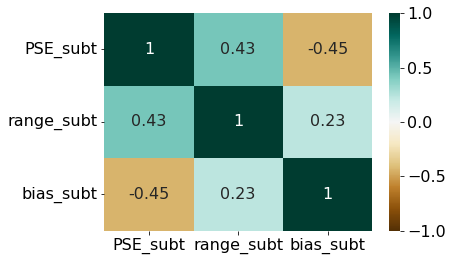

In [131]:
r_all = np.full((len(subt_col_labels),len(subt_col_labels)),np.nan)
p_all = np.full((len(subt_col_labels),len(subt_col_labels)),np.nan)
for i,row1 in enumerate(subt_col_labels):
    # row1 = row1 + '_subt'
    for j,row2 in enumerate(subt_col_labels):
        # row2 = row2 + '_pf'
        x = df[row1]
        y = df[row2]
        rows = ~(np.isnan(x)) & ~(np.isnan(y)) & ~(np.isinf(x)) & ~(np.isinf(y))
        x = x[rows]
        y = y[rows]
        r_all[i,j], p_all[i,j] = stats.pearsonr(x,y)

sns.heatmap(r_all,cmap=cmap,annot=True,vmin=-1,vmax=1)
plt.xticks(np.arange(3)+.5,subt_col_labels)
plt.yticks(np.arange(3)+.5,subt_col_labels, rotation=0)

([<matplotlib.axis.YTick at 0x7f7a517b9dd0>,
 [Text(0, 0.5, 'PSE_pf'),
  Text(0, 1.5, 'slope_pf'),
  Text(0, 2.5, 'intercept_pf')])

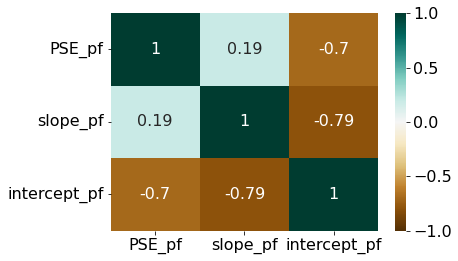

In [132]:
r_all = np.full((len(pf_col_labels),len(pf_col_labels)),np.nan)
p_all = np.full((len(pf_col_labels),len(pf_col_labels)),np.nan)
for i,row1 in enumerate(pf_col_labels):
    for j,row2 in enumerate(pf_col_labels):
        x = df[row1]
        y = df[row2]
        rows = ~(np.isnan(x)) & ~(np.isnan(y)) & ~(np.isinf(x)) & ~(np.isinf(y))
        x = x[rows]
        y = y[rows]
        r_all[i,j], p_all[i,j] = stats.pearsonr(x,y)

sns.heatmap(r_all,cmap=cmap,annot=True,vmin=-1,vmax=1)
plt.xticks(np.arange(len(pf_col_labels))+.5,pf_col_labels)
plt.yticks(np.arange(len(pf_col_labels))+.5,pf_col_labels, rotation=0)

In [133]:
from scipy import stats

In [140]:
pf_col_labels = ['PSE_pf', 'slope_pf']

In [141]:
r_all = np.full((len(subt_col_labels),len(pf_col_labels)),np.nan)
p_all = np.full((len(subt_col_labels),len(pf_col_labels)),np.nan)
for i,row1 in enumerate(subt_col_labels):
    # row1 = row1 + '_subt'
    for j,row2 in enumerate(pf_col_labels):
        # row2 = row2 + '_pf'a
        x = df[row1]
        y = df[row2]
        rows = ~(np.isnan(x)) & ~(np.isnan(y)) & ~(np.isinf(x)) & ~(np.isinf(y))
        x = x[rows]
        y = y[rows]
        r_all[i,j], p_all[i,j] = stats.pearsonr(x,y)

from multipy.fdr import lsu

# Flatten the 2D array to 1D
p_all_flattened = p_all.flatten()

# Apply the lsu correction
corrected_p_values_flattened = lsu(p_all_flattened)

# Reshape the corrected p-values back to the original 2D shape
corrected_p_values = corrected_p_values_flattened.reshape(p_all.shape)

print(corrected_p_values)

[[False False]
 [False  True]
 [ True  True]]


In [142]:
cmap = 'BrBG'#'RdBu_r'

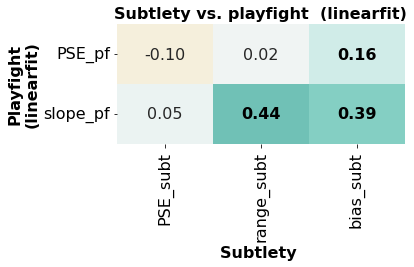

In [143]:
fig,ax = plt.subplots(nrows=1,ncols = 1, figsize=(6,4))
# ax = axs[0]
sns.heatmap(r_all.T,vmin=-1,vmax=1,annot=True,cbar=False,cmap=cmap,ax=ax,fmt='.2f')
# ax.set_title('subtlety',fontweight='bold')
ax.set_xticklabels(subt_col_labels, rotation=90, fontsize=16)
ax.set_yticklabels(pf_col_labels, rotation=0, fontsize=16)
ax.set_title('Subtlety vs. playfight  (linearfit)',fontweight='bold', fontsize=16)
ax.set_xlabel('Subtlety ',fontweight='bold', fontsize=16)
ax.set_ylabel('Playfight\n(linearfit)',fontweight='bold', fontsize=16)

# Specify cells to be bolded (example: first row and first column)
rows, cols = np.where(p_all<.05)
true_indices = list(zip(rows, cols))
for (j,i) in true_indices:
    ax.texts[i*r_all.shape[0] + j].set_weight('bold')
    ax.texts[i*r_all.shape[0] + j].set_color('k')

plt.tight_layout()
# plt.savefig('../results/curvefit_subtlety_vs_playfight_covar_mixeddesign_final_unc_linear.png', dpi=300, bbox_inches='tight')

In [82]:
results_rootfile = '../results/subtlety_playfight_mixed/trait-beh_linear/'

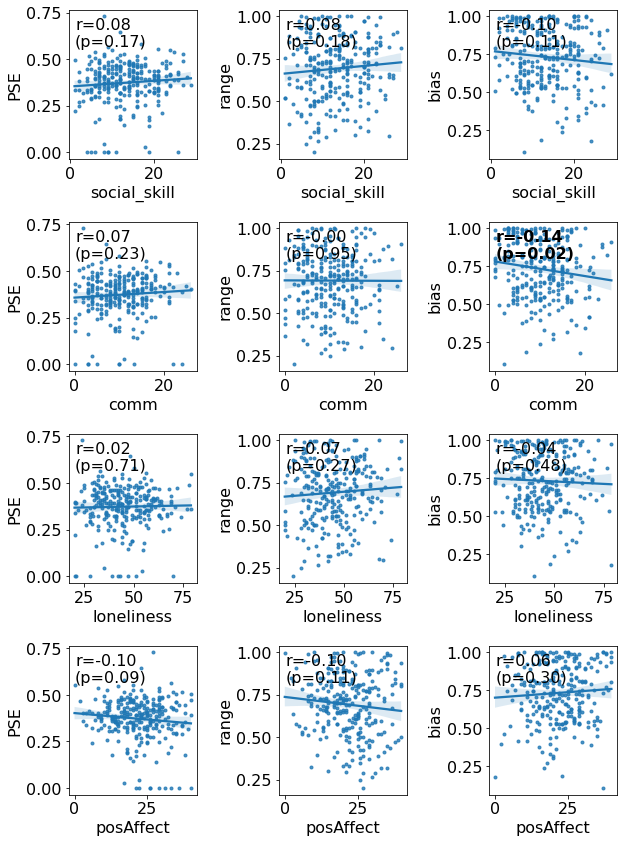

In [83]:
r_subt=np.full((len(relevant_traits),len(new_terms)),np.nan)
p_subt=np.full((len(relevant_traits),len(new_terms)),np.nan)
fig,axs = plt.subplots(ncols=len(new_terms),nrows=len(relevant_traits),figsize=(3*len(new_terms),3*len(relevant_traits)))#,sharex=True)
for i,trait in enumerate(relevant_traits):
    for j,param in enumerate(new_terms):
        param = param + '_subt'
        ax = axs[i,j]
        sns.regplot(data=df, x=trait, y = param,ax=ax, marker='.', color = 'tab:blue')
        ax.set_ylabel('_'.join(param.split('_')[:-1]))
        x,y = df[trait], df[param]
        rows = (~np.isnan(x)) & (~np.isnan(y)) & (~np.isinf(x)) & (~np.isinf(y))
        x = x[rows]
        y = y[rows]
        x = x[rows]
        y = y[rows]
        r,p = pearsonr(x,y)
        r_subt[i,j],p_subt[i,j] = r,p
        if p < .05:
            color = 'k'
            fontweight = 'bold'
        else:
            color = 'k'
            fontweight = 'normal'
        ax.annotate(f'r={r:.2f}\n({get_p(p)})',xy=(0.05,.95),xycoords='axes fraction', color = color, fontweight = fontweight, ha='left',va='top')
        # ax.set_title(f'PC{i+1}')
plt.tight_layout()
plt.savefig(f'{results_rootfile}/selectedtraits_vs_curvefit_params_subtlety_linear.png')

In [84]:
from multipy.fdr import lsu
# Flatten the 2D array to 1D
p_subt_flattened = p_subt.flatten()

# Apply the lsu correction
corrected_p_values_flattened_subt = lsu(p_subt_flattened)

# Reshape the corrected p-values back to the original 2D shape
corrected_p_values_subt = corrected_p_values_flattened_subt.reshape(p_subt.shape)

print(corrected_p_values_subt)

[[False False False]
 [False False False]
 [False False False]
 [False False False]]


In [85]:
results_rootfile

'../results/subtlety_playfight_mixed/trait-beh_linear/'

In [91]:
new_terms_pf = new_terms + ['slope_pf','intercept_pf']
new_terms_pf

['PSE', 'range', 'bias', 'slope_pf', 'intercept_pf']

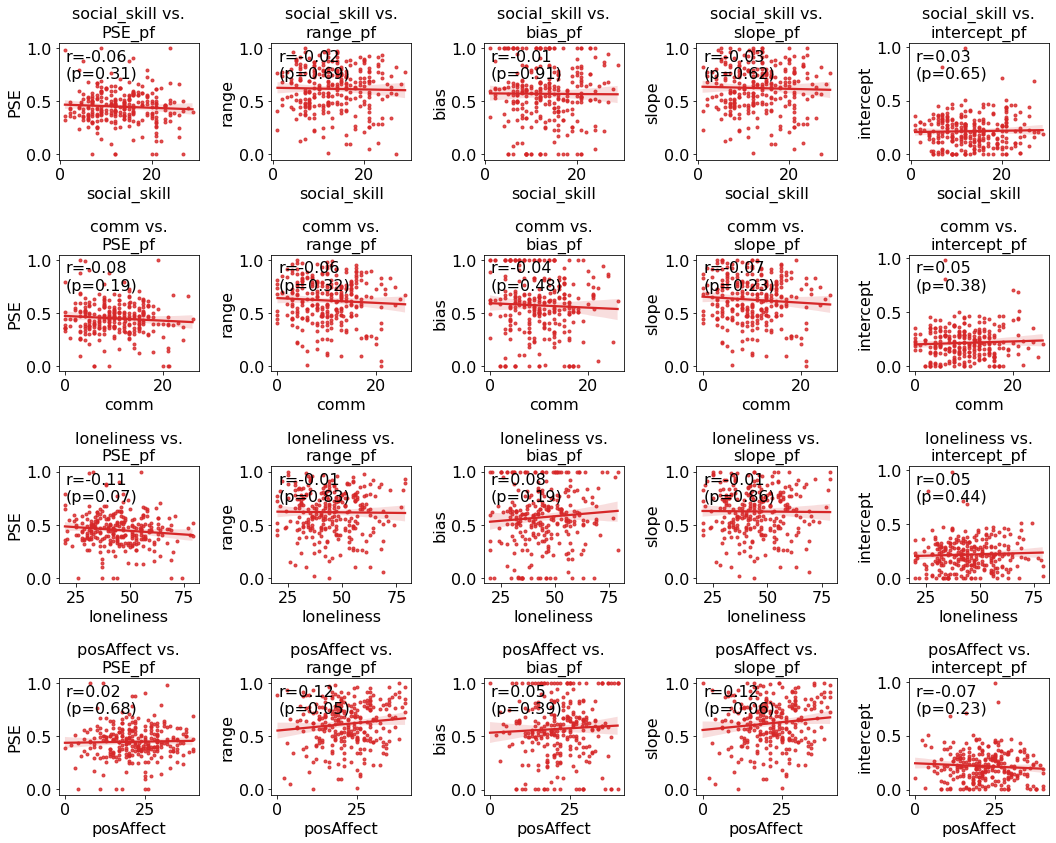

In [92]:
r_pf=np.full((len(relevant_traits),len(new_terms_pf)),np.nan)
p_pf=np.full((len(relevant_traits),len(new_terms_pf)),np.nan)
fig,axs = plt.subplots(ncols=len(new_terms_pf),nrows=len(relevant_traits),figsize=(3*len(new_terms_pf),3*len(relevant_traits)))#,sharex=True)
for i,trait in enumerate(relevant_traits):
    for j,param in enumerate(new_terms_pf):
        if '_pf' not in param:
            param = param + '_pf'
        ax = axs[i,j]
        sns.regplot(data=df, x=trait, y = param,ax=ax, marker='.',color = 'tab:red')
        ax.set_ylabel('_'.join(param.split('_')[:-1]))
        x,y = df[trait], df[param]
        rows = (~np.isnan(x)) & (~np.isnan(y)) & (~np.isinf(x)) & (~np.isinf(y))
        x = x[rows]
        y = y[rows]
        r,p = pearsonr(x,y)
        r_pf[i,j],p_pf[i,j] = r,p
        if p < .05:
            color = 'k'
            fontweight = 'bold'
        else:
            color = 'k'
            fontweight = 'normal'
        ax.annotate(f'r={r:.2f}\n({get_p(p)})',xy=(0.05,.95),xycoords='axes fraction', color = color,fontweight = fontweight,ha='left',va='top')
        ax.set_title(f'{trait} vs.\n{param}')
plt.tight_layout()
plt.savefig(f'{results_rootfile}selectedtraits_vs_curvefit_params_pf_linear.png')

In [93]:
# Flatten the 2D array to 1D
p_pf_flattened = p_pf.flatten()

# Apply the lsu correction
corrected_p_values_flattened_pf = lsu(p_pf_flattened)

# Reshape the corrected p-values back to the original 2D shape
corrected_p_values_pf = corrected_p_values_flattened_pf.reshape(p_pf.shape)

print(corrected_p_values_pf)

[[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]


In [94]:
new_params

['PSE_diff', 'range_diff', 'bias_diff']

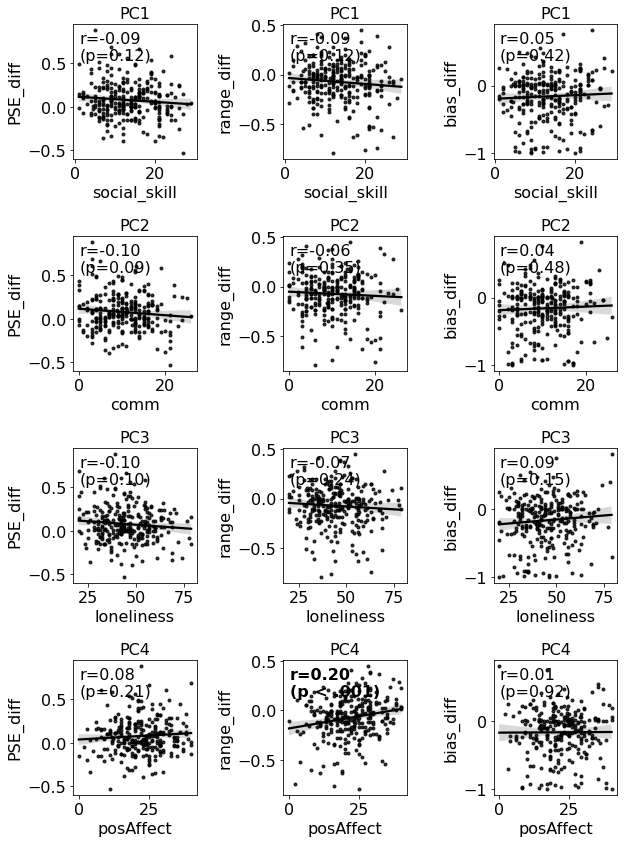

In [95]:
r_diff=np.full((len(relevant_traits),len(new_params)),np.nan)
p_diff=np.full((len(relevant_traits),len(new_params)),np.nan)
fig,axs = plt.subplots(ncols=len(new_params),nrows=len(relevant_traits),figsize=(3*len(new_params),3*len(relevant_traits)))#,sharex=True)
for i,trait in enumerate(relevant_traits):
    for j,param in enumerate(new_params):
        # param = param + '_diff'
        ax = axs[i,j]
        sns.regplot(data=df, x=trait, y = param,ax=ax, marker='.', color = 'k')
        ax.set_ylabel('_'.join(param.split('_')))
        x,y = df[trait], df[param]
        rows = (~np.isnan(x)) & (~np.isnan(y)) & (~np.isinf(x)) & (~np.isinf(y))
        x = x[rows]
        y = y[rows]
        r,p = pearsonr(x,y)
        r_diff[i,j],p_diff[i,j] = r,p
        if p < .05:
            color = 'k'
            fontweight = 'bold'
        else:
            color = 'k'
            fontweight = 'normal'
        ax.annotate(f'r={r:.2f}\n({get_p(p)})',xy=(0.05,.95),xycoords='axes fraction', color = color,fontweight = fontweight, ha='left',va='top')
        ax.set_title(f'PC{i+1}')
plt.tight_layout()
plt.savefig(f'{results_rootfile}/selectedtraits_vs_curvefit_params_pf-subt_linear.png')

In [96]:
# Flatten the 2D array to 1D
p_diff_flattened = p_diff.flatten()

# Apply the lsu correction
corrected_p_values_flattened_p_diff = lsu(p_diff_flattened)

# Reshape the corrected p-values back to the original 2D shape
corrected_p_values_diff = corrected_p_values_flattened_p_diff.reshape(p_diff.shape)

print(corrected_p_values_diff)

[[False False False]
 [False False False]
 [False False False]
 [False  True False]]
